In [1]:
""" import necessary libraries """
import noisereduce as nr

from sklearn.preprocessing import MinMaxScaler
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
from pydub import AudioSegment
import soundfile as sf
from torch import hub

C:\Users\eholy\anaconda3\envs\tf\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\eholy\anaconda3\envs\tf\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


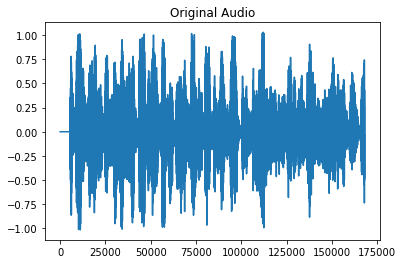

In [2]:
""" reduce noise """
#filename = "PlaneWspeech.wav"
file = "week8demo"
filename = file + ".wav"
# load data
#rate, data = wavfile.read("id10353_merged.wav")
data, rate = librosa.load(filename)

plt.figure()
plt.title("Original Audio")
plt.plot(data)
plt.show()
ipd.Audio(data, rate=rate)

In [3]:
""" split audio """

model = hub.load('JorisCos/asteroid', 'conv_tasnet', 'JorisCos/ConvTasNet_Libri2Mix_sepclean_8k')
nr_filepath = 'C:/Users/eholy/Desktop/SD/git/voiceseperation/Wrapper/' + filename
model.separate(nr_filepath, resample=True, force_overwrite=True)


Using cache found in C:\Users\eholy/.cache\torch\hub\JorisCos_asteroid_master
C:\Users\eholy/.cache\torch\hub\JorisCos_asteroid_master\asteroid\separate.py:157: UserWarning: Received multichannel signal with 2 signals, using the first channel only.
  warnings.warn(


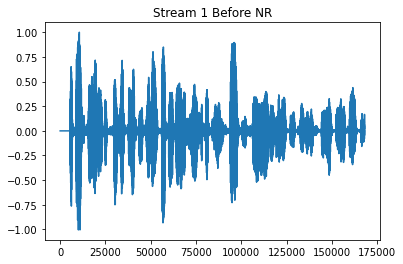

In [4]:
""" audio stream 1 """

s1_filepath = 'C:/Users/eholy/Desktop/SD/git/voiceseperation/Wrapper/'
s1_filename = file + '_est1.wav'
s1, rate = librosa.load(s1_filepath+s1_filename)

plt.figure()
plt.title("Stream 1 Before NR")
plt.plot(s1)
plt.show()

ipd.Audio(s1, rate=rate)

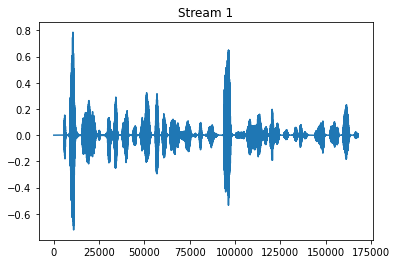

In [5]:
""" reduce noise in stream 1 """

reduced_noise = nr.reduce_noise(y=s1, sr=rate)

plt.figure()
plt.title("Stream 1")
plt.plot(reduced_noise)
plt.show()

nr1_filepath = 'C:/Users/eholy/Desktop/SD/git/voiceseperation/Wrapper/' + 'nr_' + s1_filename 
sf.write(nr1_filepath, reduced_noise, rate)

ipd.Audio(reduced_noise, rate=rate)

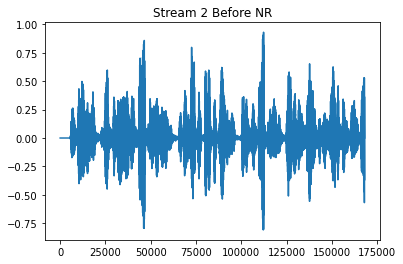

In [6]:
""" audio stream 2 """

s2_filepath = 'C:/Users/eholy/Desktop/SD/git/voiceseperation/Wrapper/'
s2_filename = file + '_est2.wav'
s2, rate = librosa.load(s2_filepath+s2_filename)

plt.figure()
plt.title("Stream 2 Before NR")
plt.plot(s2)
plt.show()

ipd.Audio(s2, rate=rate)

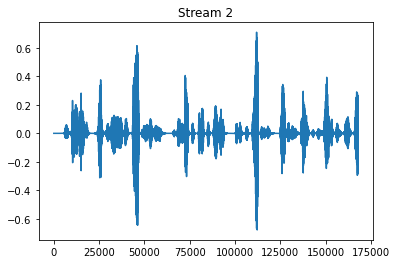

In [7]:
""" reduce noise in stream 2 """

reduced_noise = nr.reduce_noise(y=s2, sr=rate)

plt.figure()
plt.title("Stream 2")
plt.plot(reduced_noise)
plt.show()

nr2_filepath = 'C:/Users/eholy/Desktop/SD/git/voiceseperation/Wrapper/' + 'nr_' + s2_filename 
sf.write(nr2_filepath, reduced_noise, rate)

ipd.Audio(reduced_noise, rate=rate)

In [22]:
""" normalizing audio streams """

# original file
orig = AudioSegment.from_file(nr_filepath)
print("Original RMS: " + str(orig.rms))

# stream 1
stream1 = AudioSegment.from_file(nr1_filepath)
print("Stream 1 RMS: " + str(stream1.rms))

# stream 2
stream2 = AudioSegment.from_file(nr2_filepath)
print("Stream 2 RMS: " + str(stream2.rms))

# louder streams
louder1 = stream1.apply_gain(orig.dBFS - stream1.dBFS)
louder2 = stream2.apply_gain(orig.dBFS - stream2.dBFS)

print("Louder Stream 1 RMS: " + str(louder1.rms))
print("Louder Stream 2 RMS: " + str(louder2.rms))

#louder1.export(nr1_filepath, format='wav')
#louder2.export(nr2_filepath, format='wav')

louderfilepath = 'C:/Users/eholy/Desktop/SD/git/voiceseperation/Wrapper/' + 'norm_'
#sf.write(louderfilepath + s1_filename, louder1, rate)
#sf.write(louderfilepath + s2_filename, louder2, rate)


louder1.export(louderfilepath + s1_filename, format='wav')
louder2.export(louderfilepath + s2_filename, format='wav')

Original RMS: 7074
Stream 1 RMS: 1450
Stream 2 RMS: 1433
Louder Stream 1 RMS: 6125
Louder Stream 2 RMS: 6205


<_io.BufferedRandom name='C:/Users/eholy/Desktop/SD/git/voiceseperation/Wrapper/norm_week8demo_est2.wav'>